<a href="https://colab.research.google.com/github/kazimovmirkazim/Computer-Vision/blob/main/CV_Animal_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/bin/bash
!curl -L -o animal-faces.zip https://www.kaggle.com/api/v1/datasets/download/andrewmvd/animal-faces

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  695M  100  695M    0     0   150M      0  0:00:04  0:00:04 --:--:--  170M


In [ ]:
!unzip '/content/animal-faces.zip'

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator (rescale=1/255.)
val_datagen = ImageDataGenerator (rescale= 1/255.)

train_dir ='/content/afhq/train'
val_dir = '/content/afhq/val'

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode = 'categorical',
    seed=42  )
valid_data = val_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode = 'categorical',
    seed=42
)

model_1 = tf.keras.Sequential (
    [
        tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu',kernel_initializer='he_normal',
                               input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding='valid'),
        tf.keras.layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.Conv2D(256,3,activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(3,activation='softmax')
    ]
)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
train_data.class_indices.items()

dict_items([('cat', 0), ('dog', 1), ('wild', 2)])

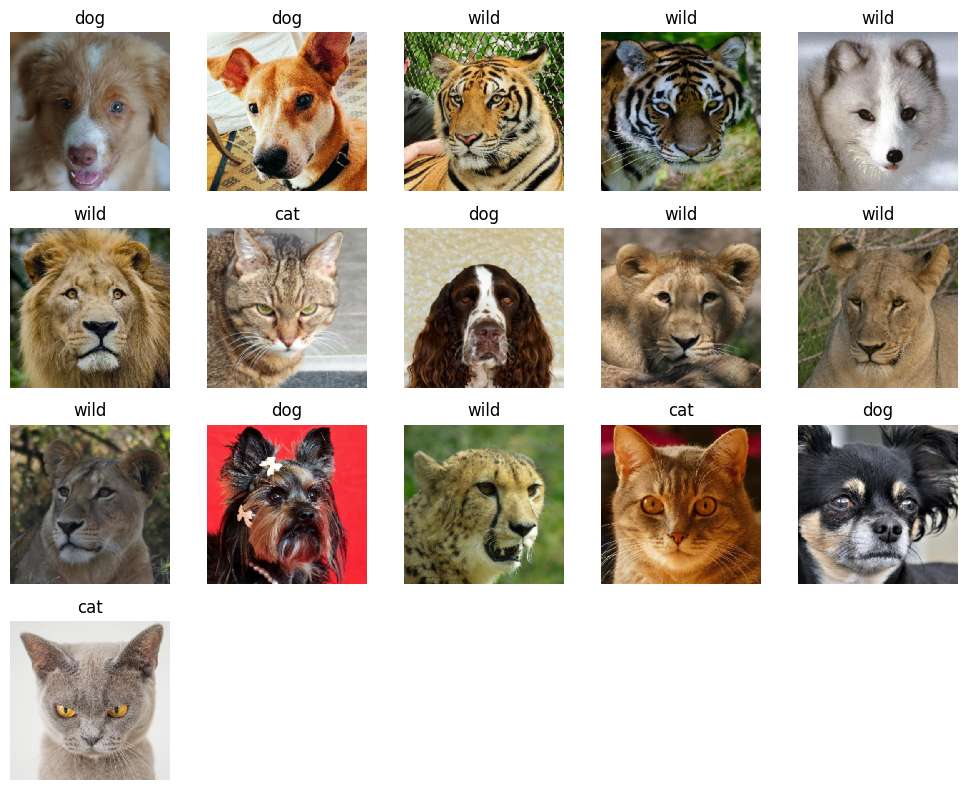

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,8))

class_names = [item[0] for item in sorted(train_data.class_indices.items(), key=lambda x: x[1])]

for image,label in train_data:
  for i in range(16):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    plt.title(class_names[np.argmax(label[i])])
    plt.axis('off')
  plt.tight_layout()
  plt.show()
  break


In [ ]:
model_1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 106, 106, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 53, 53, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 719104)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │   184,090,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,514,115 (703.87 MB)

 Trainable params: 184,513,347 (703.86 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])


In [ ]:
history = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch= len(train_data),
    validation_data= valid_data,
    validation_steps= len(valid_data)
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 174s 324ms/step - accuracy: 0.7810 - loss: 0.5514 - val_accuracy: 0.8147 - val_loss: 0.4271
Epoch 2/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 155s 270ms/step - accuracy: 0.9506 - loss: 0.1378 - val_accuracy: 0.8793 - val_loss: 0.3841
Epoch 3/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 124s 271ms/step - accuracy: 0.9735 - loss: 0.0712 - val_accuracy: 0.9447 - val_loss: 0.1638
Epoch 4/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 141s 268ms/step - accuracy: 0.9856 - loss: 0.0456 - val_accuracy: 0.9427 - val_loss: 0.1785
Epoch 5/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 142s 269ms/step - accuracy: 0.9887 - loss: 0.0334 - val_accuracy: 0.9427 - val_loss: 0.1873


In [ ]:
#error analysis, loss visuallasdirin, accuracy visuallasdirin